In [1]:
import pandas as pd
import numpy as np
import pyodbc
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk 
from nltk.corpus import stopwords 
import re
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from nltk.util import ngrams
from collections import Counter
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.metrics import r2_score
from matplotlib import rcParams
from plotly.offline import iplot 
from plotly.offline import iplot 
import plotly.graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly_express as px 

In [2]:
server = 'BDC11-L-G01FPPR'
db1 = 'DtaaS'
tcon = 'yes'
uname = 'DIR\srinivas.madsi'
pword = 'Good_444'
   
conn = pyodbc.connect(driver='{SQL Server}', host=server, database=db1,
                       trusted_connection=tcon, user=uname, password=pword)



In [3]:
conn.execute("""
select name_vendor,dfr_sub_area , activity_name, UPPER(work_order_desc) as work_order_desc,units
into #temp_pmv_sample1
from DtaaS.dbo.Summarized_PMV where type = 'Actual Labor Units'
""")


conn.execute("""
select name_vendor,dfr_sub_area , activity_name, units, work_order_desc,
CASE 
     WHEN work_order_desc like '%PIPING AND VALVE%' then  1
       else 0
end as piping_valves,
CASE 
     WHEN work_order_desc like '%INSTRUMENTATION%' then  1
       else 0
end as instrumentation,
CASE 
     WHEN work_order_desc like '%FAN%' or work_order_desc like '%DUCTING%' then  1
       else 0
end as fans_ducting,
CASE 
     WHEN work_order_desc like '%CONTROL VALVES' then  1
       else 0
end as control_valves,
CASE 
     WHEN work_order_desc like '%PIPING MODIFI%' then  1
       else 0
end as piping_modification,
CASE 
     WHEN work_order_desc like '%COLUMNS%' then  1
       else 0
end as columns_towers,
CASE 
     WHEN work_order_desc like '%HY%TA%(SES%)%' then  1
       else 0
end as HY_TA_SES_related,
CASE 
     WHEN work_order_desc like '%CN%TA%(SES%)%' or work_order_desc like '%CN%TA%UPGRADE%'  then  1
       else 0
end as CN_TA_SES_related,
CASE 
     WHEN work_order_desc like '%TRANSFER LINES' then  1
       else 0
end as transfer_lines,
CASE 
     WHEN work_order_desc like '%REPAIRS%' then  1
       else 0
end as repairs,

CASE 
     WHEN work_order_desc like '%PSV%' or work_order_desc like '%HEAT EXCHANGERS' then  1 
        else 0
end as psv_heatexchangers,
CASE 
     WHEN work_order_desc like '%REACTOR STRUCTU' then  1
       else 0
end as reactor_structure,
CASE 
     WHEN work_order_desc like '%LINE CLEANING' then  1
       else 0
end as line_cleaning,
CASE 
     WHEN work_order_desc like '%FURNACE AND FLARES%' then  1
       else 0
end as furnace_flares,
CASE 
     WHEN work_order_desc like '%MOV%' or work_order_desc like '%CONVERSION%' then  1
       else 0
end as movs,
CASE 
     WHEN work_order_desc like '%PROCESS ASSIS%' then  1
       else 0
end as process_assistance,
CASE 
     WHEN work_order_desc like ('%INSPECTION%')  or work_order_desc like ('%ENG%TECH%') then  1
       else 0
end as inspection_related,
CASE 
     WHEN work_order_desc like '%ANGLE CONTROL%' then  1
       else 0
end as angle_control,
CASE 
     WHEN work_order_desc like '%DIVERTER STACK%' then  1
       else 0
end as diverter_stack,
CASE 
     WHEN work_order_desc like '%POWER & LIGHT%' then  1
       else 0
end as power_lights,
CASE 
     WHEN work_order_desc like '%TANK COVER REPLACEMENT' then  1
       else 0
end as tankcover_replacement,

CASE 
     WHEN work_order_desc like '%DRY GAS%' then  1
       else 0
end as dry_gas,
CASE 
     WHEN work_order_desc like '%WATER WASH' then  1
       else 0
end as water_wash,
CASE 
     WHEN work_order_desc like '%ECONOMIZER%' then  1
       else 0
end as economizer,
CASE 
     WHEN work_order_desc like '%DEAERATOR VESSEL' then  1
       else 0
end as deaerator_vessel,
CASE 
     WHEN work_order_desc like '%TURNAROUND%' then  1
       else 0
end as turnaround,
CASE 
     WHEN work_order_desc like '%SYSTEM UPGRADE%' then  1
       else 0
end as system_upgrade,
CASE 
     WHEN work_order_desc like '%REACTOR/SCRUBB%' then  1
       else 0
end as reactor_scrubber,
CASE 
     WHEN work_order_desc like '%SUPERHEATER%' then  1
       else 0
end as superheater,
CASE 
     WHEN work_order_desc like '%CATALYST%' then  1
       else 0
end as catalyst_associated,

CASE 
     WHEN work_order_desc like '%ELECTRICAL' then  1
       else 0
end as electrical,
CASE 
     WHEN work_order_desc like 'VALVES & ACTUATORS' then  1
       else 0
end as valves_actuators,
CASE 
     WHEN work_order_desc like '%SLIDE VALVES' then  1
       else 0
end as slide_valves,
CASE 
     WHEN work_order_desc like '%ROTATING EQUIPMENT' then  1
       else 0
end as rotating_equipment,
CASE 
     WHEN work_order_desc like '%STEAM GENERATION%' then  1
       else 0
end as steam_generation,
CASE 
     WHEN work_order_desc like '%PRECIPITATORS%' then  1
       else 0
end as precipitators,

CASE 
     WHEN work_order_desc like '%OVERPRESSU%' then  1
       else 0
end as over_pressure,
CASE 
     WHEN work_order_desc like 'SCAFFOLD YARD%' then  1
       else 0
end as scaffold_yard,
CASE 
     WHEN work_order_desc like '%BURNER' then  1
       else 0
end as burner,
CASE 
     WHEN work_order_desc like '%FRACTIONATOR' then  1
       else 0
end as fractionator,
CASE 
     WHEN work_order_desc like '%VESSELS%' then  1
       else 0
end as vessels,
CASE 
     WHEN work_order_desc like '%ELEVATOR MATERIAL%' then  1
       else 0
end as elevator_material,
CASE 
     WHEN work_order_desc like '%MOB & DEMOB%' then  1
       else 0
end as mob_demob,
CASE 
     WHEN work_order_desc like '%VALVES%SPOOLS%' then  1
       else 0
end as valves_spools,
CASE 
     WHEN work_order_desc like '%CRANES%OPERATORS%' then  1
       else 0
end as crane_operators,
CASE 
     WHEN work_order_desc like '%UNASSIGNED%' then  1
       else 0
end as unassigned
into #temp_pmv_sample2
from #temp_pmv_sample1
""")

conn.execute("""
select *,
(case when activity_name like  '%inspect%' then 1 else 0
end) as inspect,
(case when activity_name like  '%weld%' then 1 else 0
end) as weld,
(case when activity_name like  '%scaf%' then 1 else 0
end) as scaffold,
(case when activity_name like  '%instal%' then 1 else 0
end) as install,
(case when activity_name like  '%valv%' then 1 else 0
end) as valve,
(case when activity_name like  '%erect%' then 1 else 0
end) as erect,
case when activity_name like  '%remov%' then 1 else 0
end as remove,
(case when activity_name like  '%insul%' then 1 else 0
end) as insul,
case when activity_name like  '%block%' then 1 else 0
end as blok,
(case when activity_name like  '%power%' then 1 else 0
end) as power,
(case when activity_name like  '%light%' then 1 else 0
end) as light,
(case when activity_name like  '%reinsul%' then 1 else 0
end) as reinsul,
(case when activity_name like  '%spool%' then 1 else 0
end) as spool,
(case when activity_name like  '%repair%' then 1 else 0
end) as repair,
(case when activity_name like  '%rig%' then 1 else 0
end) as rig,
(case when activity_name like  '%process%' AND  activity_name like '%assist%'  then 1 else 0
end) as process_assist,
(case when activity_name like  '%united%' AND  activity_name like '%safety%'  then 1 else 0
end) as united_safety,
(case when activity_name like  '%labor%' AND  activity_name like '%fire%'  then 1 else 0
end) as labor_fire,
(case when activity_name like  '%hpww%' then 1 else 0
end) as hpww
into #temp_pmv_sample3
from #temp_pmv_sample2
""")


In [4]:
df = pd.read_sql("""select * from #temp_pmv_sample3 """,conn)

In [5]:
df2 = df[df['piping_valves']==1]

In [6]:
df2.head()

,name_vendor,dfr_sub_area,activity_name,units,work_order_desc,piping_valves,instrumentation,fans_ducting,control_valves,piping_modification,...,power,light,reinsul,spool,repair,rig,process_assist,united_safety,labor_fire,hpww
0,Maintenance Inc.,37-1,"Rig & Install 24"" valve on line 37-1CW-2004",9.0,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Maintenance Inc.,37-1,"Rig & Replace 3"" valve on line 37-1CW-2008",18.0,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Maintenance Inc.,37-1,"Rig & Replace 3"" "" valve on line 37-1CW-2004",18.0,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Maintenance Inc.,37-1,"FW#1 Inspect & MPI 4"" flange connection as pe...",6.0,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Maintenance Inc.,37-1,"FW#1&2 Prep & Fit & tack 4"" flange connecti...",6.0,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2['preprocess_activity']= df2['activity_name'].str.replace(r'([^a-zA-Z ]+?)', '').str.strip()
df2['preprocess_activity'] = df2['preprocess_activity'].str.lower()
df2['preprocess_activity'] = df2['preprocess_activity'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df2['preprocess_activity']= df2['preprocess_activity'].str.replace('  ',' ')

stopwords = nltk.corpus.stopwords.words('english')
df2['preprocess_activity'] = df2['preprocess_activity'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


In [8]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text))

In [9]:
df2['preprocess_activity'] = df2.preprocess_activity.apply(lemmatize_text)

In [10]:
df2

,name_vendor,dfr_sub_area,activity_name,units,work_order_desc,piping_valves,instrumentation,fans_ducting,control_valves,piping_modification,...,light,reinsul,spool,repair,rig,process_assist,united_safety,labor_fire,hpww,preprocess_activity
0,Maintenance Inc.,37-1,"Rig & Install 24"" valve on line 37-1CW-2004",9.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,install valve line
1,Maintenance Inc.,37-1,"Rig & Replace 3"" valve on line 37-1CW-2008",18.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,replace valve line
2,Maintenance Inc.,37-1,"Rig & Replace 3"" "" valve on line 37-1CW-2004",18.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,replace valve line
3,Maintenance Inc.,37-1,"FW#1 Inspect & MPI 4"" flange connection as pe...",6.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inspect flange connection
4,Maintenance Inc.,37-1,"FW#1&2 Prep & Fit & tack 4"" flange connecti...",6.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,prep tack flange connection
5,Maintenance Inc.,37-1,Zip cut & remove spool to modified as per EWP...,20.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,remove spool modified coordinatior direction
6,Maintenance Inc.,37-1,"FW#7 Weld out 4"" flange connection as per EWP...",15.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,weld flange connection
7,Maintenance Inc.,37-1,Install double block & bleed as per EWP-723 a...,5.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,install double block bleed
8,Maintenance Inc.,37-1,Install double block & bleed as per EWP-723 a...,5.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,install double block bleed
9,Maintenance Inc.,37-1,"FW#1 Inspect & MPI 4"" flange connection as pe...",6.000000,PLT 37-1 2018 CN TA PIPING AND VALVES,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inspect flange connection


In [11]:
no_topics = 20

c = CountVectorizer(stop_words='english')
X_text_c = c.fit_transform(df2['preprocess_activity'])

In [12]:
lda = LatentDirichletAllocation(learning_method = 'online', n_components=no_topics, random_state=0).fit(X_text_c)
X_text_c_feature_names = c.get_feature_names()


In [13]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [14]:
no_top_words = 10
display_topics(lda, X_text_c_feature_names, no_top_words)

Topic 0:
replace valve service recommission bypass fractured conveyor globe packing boiler
Topic 1:
valve drain bleed block inlet reinstall outlet install double wash
Topic 2:
pas elbow hoarding remove ppnb away wheel beam cutout manifold
Topic 3:
scaffold erect scaf access existing replacement allow valve modify hording
Topic 4:
blind spark containment labour downstream watch rerate package grating week
Topic 5:
sign conveyor area repair final operation leaking ensure split weldolet
Topic 6:
valve gate insulate hpww globe transport bake unit reclad adjacent
Topic 7:
weld pipe machine build cold fitter team gusset connection field
Topic 8:
spool hydro fabricate field measure tent perform jacob shop direction
Topic 9:
line valve remove reinsulate trace tracing energize plug stud warm
Topic 10:
required valve removal pull walkdown mark deenergize decommission confirm place
Topic 11:
location weld inspection tack prep check root pas inprogress joint
Topic 12:
install ground steam deck lev

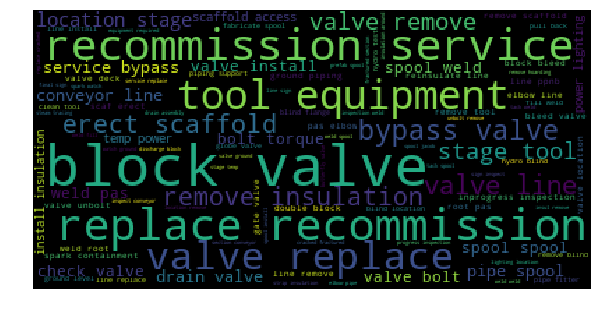

In [15]:

wordcloud = WordCloud().generate(' '.join(df2['preprocess_activity']))
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
# Finding maximum frequency of the words from the activity column
split_it = [x.split(" ") for x in df2['preprocess_activity']]
totals = Counter(i for i in list(itertools.chain.from_iterable(split_it)))
most_occur = totals.most_common(50)

In [17]:
most_occur

[('valve', 4333),
 ('remove', 2041),
 ('spool', 2012),
 ('line', 1881),
 ('weld', 1362),
 ('install', 1163),
 ('replace', 1158),
 ('tool', 1054),
 ('location', 948),
 ('block', 896),
 ('scaffold', 842),
 ('insulation', 842),
 ('service', 746),
 ('pipe', 733),
 ('piping', 731),
 ('recommission', 710),
 ('pas', 702),
 ('required', 693),
 ('blind', 655),
 ('equipment', 612),
 ('drain', 575),
 ('bypass', 552),
 ('erect', 519),
 ('stage', 519),
 ('bolt', 518),
 ('clean', 513),
 ('torque', 457),
 ('hydro', 450),
 ('elbow', 430),
 ('flange', 428),
 ('unbolt', 416),
 ('ground', 372),
 ('tack', 366),
 ('inspection', 364),
 ('support', 352),
 ('section', 339),
 ('prep', 331),
 ('access', 324),
 ('rigging', 307),
 ('back', 298),
 ('check', 296),
 ('test', 293),
 ('inspect', 288),
 ('welding', 272),
 ('conveyor', 269),
 ('scaf', 267),
 ('suction', 266),
 ('discharge', 265),
 ('fabricate', 265),
 ('hoarding', 261)]

In [30]:
# Finding bi-grams
bigrams = [b for l in df2['preprocess_activity'] for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
#print(bigrams)
fdist = nltk.FreqDist(bigrams)
for k,v in sorted(fdist.items(),key=lambda item: item[-1], reverse=True):
    print(k,v)
    

('block', 'valve') 741
('recommission', 'service') 710
('replace', 'recommission') 705
('tool', 'equipment') 568
('bypass', 'valve') 424
('valve', 'line') 382
('erect', 'scaffold') 382
('remove', 'insulation') 377
('stage', 'tool') 325
('service', 'bypass') 262
('conveyor', 'line') 261
('pipe', 'spool') 251
('drain', 'valve') 246
('check', 'valve') 219
('weld', 'pas') 210
('bolt', 'torque') 180
('scaffold', 'access') 176
('install', 'insulation') 171
('temp', 'power') 171
('power', 'lighting') 171
('inprogress', 'inspection') 170
('pas', 'elbow') 168
('elbow', 'line') 158
('scaf', 'erect') 158
('line', 'ppnb') 155
('remove', 'tool') 154
('ground', 'piping') 152
('block', 'bleed') 146
('remove', 'valve') 145
('valve', 'location') 140
('bleed', 'valve') 138
('double', 'block') 136
('remove', 'scaffold') 136
('root', 'pas') 135
('weld', 'root') 134
('spool', 'weld') 133
('spark', 'containment') 133
('reinsulate', 'line') 132
('valve', 'deck') 130
('gate', 'valve') 129
('fabricate', 'spool

('away', 'tracer') 21
('vertical', 'section') 21
('fabricate', 'eabc') 21
('beam', 'access') 21
('valve', 'adjacent') 21
('face', 'install') 21
('lighting', 'work') 21
('replacement', 'pas') 20
('remove', 'bypass') 20
('insulation', 'spool') 20
('spool', 'spool') 20
('complete', 'piping') 20
('piping', 'prep') 20
('weld', 'hydro') 20
('valve', 'prep') 20
('section', 'line') 20
('tool', 'welding') 20
('prior', 'cutting') 20
('tool', 'valve') 20
('valve', 'chain') 20
('remove', 'passing') 20
('roll', 'clean') 20
('clean', 'gasket') 20
('tool', 'strainer') 20
('strainer', 'location') 20
('deenergize', 'applicable') 20
('orientation', 'prior') 20
('repair', 'technical') 20
('insulation', 'required') 20
('weld', 'fitting') 20
('scaffold', 'demolition') 20
('demolition', 'insulation') 20
('install', 'pas') 19
('service', 'gate') 19
('rigging', 'remove') 19
('support', 'piping') 19
('install', 'upgraded') 19
('upgraded', 'gasket') 19
('gasket', 'pas') 19
('flangetv', 'bypass') 19
('spool', 'c

('seal', 'slip') 9
('scaffoldhoarding', 'valve') 9
('support', 'active') 9
('active', 'block') 9
('block', 'spring') 9
('remove', 'check') 9
('blind', 'hydro') 9
('walk', 'line') 9
('replace', 'vent') 9
('blind', 'rerate') 9
('north', 'side') 9
('tracing', 'flow') 9
('modify', 'existing') 9
('existing', 'scaffold') 9
('replace', 'packing') 9
('packing', 'valve') 9
('install', 'field') 9
('inside', 'valve') 9
('valve', 'inside') 9
('unbolt', 'condensate') 9
('fabricate', 'elbow') 9
('steam', 'valve') 9
('flush', 'jump') 9
('bfwb', 'system') 9
('sign', 'hydro') 9
('prep', 'required') 9
('inprocess', 'closure') 9
('demo', 'spool') 9
('energize', 'location') 9
('fitting', 'execpt') 9
('execpt', 'final') 9
('final', 'connection') 9
('connection', 'transmitter') 9
('transmitter', 'impulse') 9
('impulse', 'line') 9
('operator', 'hand') 9
('wheel', 'landyard') 9
('blind', 'spider') 9
('stud', 'downstream') 9
('roll', 'tube') 9
('remove', 'fretting') 9
('bolt', 'fretting') 9
('line', 'flow') 8


('prep', 'installation') 5
('blind', 'used') 5
('used', 'ensure') 5
('ensure', 'bolted') 5
('joint', 'tight') 5
('complete', 'hydro') 5
('hydro', 'gauge') 5
('lower', 'valve') 5
('upstream', 'inprogress') 5
('valve', 'upstream') 5
('stream', 'check') 5
('back', 'trace') 5
('energize', 'megger') 5
('water', 'line') 5
('ensure', 'good') 5
('good', 'working') 5
('working', 'order') 5
('fill', 'chloride') 5
('chloride', 'free') 5
('free', 'water') 5
('water', 'le') 5
('le', 'pressure') 5
('flange', 'hydro') 5
('blind', 'tent') 5
('blind', 'gauge') 5
('bolt', 'complete') 5
('move', 'tent') 5
('pipe', 'prior') 5
('hydro', 'suction') 5
('jacob', 'install') 5
('obtain', 'prep') 5
('ground', 'tent') 5
('preheat', 'welder') 5
('blanket', 'valve') 5
('trace', 'process') 5
('torque', 'high') 5
('valve', 'comp') 5
('progress', 'examination') 5
('weld', 'repair') 5
('remove', 'tooling') 5
('field', 'location') 5
('split', 'pipe') 5
('support', 'spool') 5
('warm', 'linetorque') 5
('build', 'flange') 

('insulation', 'fuel') 3
('scaffold', 'leaking') 3
('bypass', 'location') 3
('relocate', 'cold') 3
('cold', 'equipment') 3
('bake', 'cutting') 3
('remove', 'split') 3
('fabricate', 'pipe') 3
('fabricate', 'shoe') 3
('insul', 'install') 3
('tool', 'battery') 3
('install', 'threaded') 3
('existing', 'piping') 3
('knife', 'gate') 3
('hydro', 'discharge') 3
('pipfitters', 'hydro') 3
('field', 'prep') 3
('prep', 'butt') 3
('wrap', 'complete') 3
('joint', 'drain') 3
('replce', 'drain') 3
('replce', 'block') 3
('remove', 'fill') 3
('salvage', 'fill') 3
('inspect', 'complete') 3
('complete', 'cleaned') 3
('cleaned', 'spool') 3
('scaffold', 'valve') 3
('replacement', 'spool') 3
('flange', 'header') 3
('place', 'valve') 3
('work', 'area') 3
('torque', 'downstream') 3
('ceda', 'wash') 3
('location', 'prior') 3
('fill', 'valve') 3
('remove', 'spring') 3
('bottom', 'piping') 3
('piping', 'botton') 3
('botton', 'channel') 3
('head', 'remove') 3
('remove', 'access') 3
('valve', 'stage') 3
('stage', '

('based', 'point') 2
('fabricate', 'double') 2
('double', 'bbme') 2
('perform', 'alley') 2
('perform', 'elbow') 2
('hoarding', 'battery') 2
('limit', 'blinding') 2
('blinding', 'replacing') 2
('replacing', 'vent') 2
('hoarding', 'scaffolding') 2
('weld', 'cnfc') 2
('lube', 'cooler') 2
('inspect', 'closure') 2
('weld', 'install') 2
('install', 'vent') 2
('area', 'tool') 2
('flange', 'remove') 2
('thread', 'spool') 2
('pipefitters', 'reinstall') 2
('repaired', 'strainer') 2
('pipfitters', 'reinstall') 2
('repaired', 'knife') 2
('piping', 'near') 2
('setup', 'hydro') 2
('drwg', 'reuse') 2
('reuse', 'existing') 2
('existing', 'fill') 2
('fabricate', 'tpabc') 2
('tpabc', 'spool') 2
('boltup', 'thread') 2
('thread', 'salvaged') 2
('salvaged', 'fill') 2
('boltup', 'spool') 2
('hold', 'point') 2
('scaffold', 'hang') 2
('rigging', 'steel') 2
('bellow', 'gasket') 2
('gasket', 'change') 2
('existing', 'mating') 2
('mating', 'flange') 2
('pipe', 'weld') 2
('weld', 'olet') 2
('branch', 'valve') 2
(

('replacing', 'pipe') 2
('pipe', 'elev') 2
('elev', 'drawing') 2
('scaffold', 'inspect') 2
('inspect', 'check') 2
('valve', 'wear') 2
('spool', 'approx') 2
('erect', 'hanging') 2
('hanging', 'scaffold') 2
('north', 'south') 2
('south', 'alley') 2
('alley', 'centering') 2
('centering', 'pannel') 2
('pannel', 'approx') 2
('scaffold', 'weld') 2
('blanket', 'save') 2
('rigging', 'elbow') 2
('ship', 'spool') 2
('install', 'gear') 2
('gear', 'operator') 2
('unbolt', 'blind') 2
('flange', 'blind') 2
('also', 'part') 2
('inside', 'transverse') 2
('transverse', 'vertical') 2
('line', 'complete') 2
('spring', 'hanger') 2
('check', 'operation') 2
('operation', 'complete') 2
('scaffolding', 'deck') 2
('disconnect', 'powercontrol') 2
('reconnect', 'powercontrol') 2
('powercontrol', 'verify') 2
('verify', 'signal') 2
('signal', 'control') 2
('control', 'room') 2
('access', 'cable') 2
('insulation', 'tagged') 2
('tagged', 'valve') 2
('install', 'coating') 2
('weld', 'spec') 2
('deck', 'grade') 2
('us

('flange', 'spool') 1
('dismantle', 'hoarding') 1
('hoarding', 'support') 1
('containment', 'location') 1
('valve', 'alley') 1
('insulation', 'header') 1
('removal', 'rrcbp') 1
('erect', 'additional') 1
('additional', 'hoarding') 1
('hoarding', 'removal') 1
('removal', 'split') 1
('line', 'utility') 1
('station', 'rrcbp') 1
('insulation', 'rrcbp') 1
('hoarding', 'rrcbp') 1
('containment', 'replacement') 1
('access', 'hydrotest') 1
('location', 'hydrotesting') 1
('used', 'hydrotesting') 1
('erect', 'scaffoldinghoarding') 1
('install', 'insulationincluding') 1
('insulationincluding', 'blanket') 1
('blanket', 'outside') 1
('insulation', 'flow') 1
('flow', 'valvesincluding') 1
('valvesincluding', 'blinding') 1
('install', 'barricade') 1
('remove', 'barricade') 1
('remove', 'inslulation') 1
('scaffold', 'outlet') 1
('insulation', 'flangetv') 1
('hoarding', 'flangetv') 1
('insulation', 'remaining') 1
('cold', 'cutting') 1
('cutting', 'equipment') 1
('install', 'tracing') 1
('tracing', 'line'

('drain', 'vent') 1
('spool', 'header') 1
('weld', 'nipolet') 1
('nipolet', 'header') 1
('header', 'progress') 1
('confirm', 'spool') 1
('spool', 'need') 1
('need', 'remove') 1
('remove', 'completing') 1
('completing', 'field') 1
('field', 'check') 1
('upstream', 'save') 1
('stud', 'send') 1
('upstream', 'complete') 1
('building', 'send') 1
('laydown', 'yard') 1
('weld', 'lifting') 1
('lifting', 'lug') 1
('lug', 'vertical') 1
('fabrication', 'tentsupply') 1
('tentsupply', 'material') 1
('list', 'planner') 1
('tool', 'replacement') 1
('section', 'inlet') 1
('perform', 'xray') 1
('test', 'inlet') 1
('measure', 'mark') 1
('point', 'pipe') 1
('dispose', 'pipe') 1
('rigging', 'upstream') 1
('rigging', 'area') 1
('support', 'measurments') 1
('measurments', 'fabricate') 1
('rigging', 'replace') 1
('bolt', 'line') 1
('setup', 'rigging') 1
('measure', 'determine') 1
('determine', 'material') 1
('pick', 'transport') 1
('transport', 'material') 1
('material', 'hoarding') 1
('equipment', 'install'

('pipe', 'sandblasted') 1
('sandblasted', 'coated') 1
('scaffold', 'north') 1
('north', 'lube') 1
('lube', 'pump') 1
('pump', 'approx') 1
('approx', 'ground') 1
('used', 'cutting') 1
('provide', 'scaffold') 1
('scaffold', 'barricade') 1
('barricade', 'fall') 1
('fall', 'grating') 1
('grating', 'hole') 1
('scaffold', 'barricage') 1
('barricage', 'grating') 1
('valve', 'quilled') 1
('quilled', 'peen') 1
('clean', 'elbow') 1
('elbow', 'area') 1
('clean', 'outside') 1
('outside', 'area') 1
('rigging', 'main') 1
('clean', 'main') 1
('suction', 'area') 1
('rigging', 'slop') 1
('clean', 'slop') 1
('slop', 'area') 1
('tool', 'common') 1
('common', 'oulet') 1
('oulet', 'header') 1
('clean', 'common') 1
('rigging', 'root') 1
('clean', 'root') 1
('valve', 'pump') 1
('flange', 'confirm') 1
('blind', 'also') 1
('clean', 'circ') 1
('disconnect', 'spool') 1
('report', 'finding') 1
('finding', 'determine') 1
('determine', 'inspection') 1
('inspection', 'required') 1
('required', 'vertical') 1
('meet',

('clean', 'drip') 1
('spool', 'rigging') 1
('required', 'location') 1
('spool', 'pending') 1
('removereplace', 'valve') 1
('valve', 'packing') 1
('shore', 'piping') 1
('piping', 'removal') 1
('spool', 'scrap') 1
('scrap', 'yard') 1
('yard', 'boom') 1
('transport', 'check') 1
('scaffolding', 'grating') 1
('grating', 'spool') 1
('wrap', 'spool') 1
('spool', 'replacement') 1
('insulate', 'replaced') 1
('replace', 'split') 1
('scaffold', 'accomodate') 1
('accomodate', 'replacement') 1
('spool', 'drawing') 1
('replace', 'rection') 1
('rection', 'line') 1
('hoarding', 'field') 1
('split', 'center') 1
('center', 'shoe') 1
('shoe', 'damage') 1
('damage', 'expected') 1
('insulate', 'replacement') 1
('line', 'common') 1
('common', 'header') 1
('valve', 'loop') 1
('seal', 'flange') 1
('flange', 'torque') 1
('torque', 'upper') 1
('upper', 'flange') 1
('blind', 'connect') 1
('connect', 'drain') 1
('flange', 'actuator') 1
('actuator', 'stud') 1
('valve', 'actuator') 1
('actuator', 'shop') 1
('shop',

# Quantile Regression

In [31]:
data = df2.loc[df2['units']>0]

In [32]:
data['units'].describe()

count    12385.000000
mean         7.156318
std         12.264121
min          0.058824
25%          1.142857
50%          4.000000
75%          8.000000
max        181.818182
Name: units, dtype: float64

In [33]:
                 
# Function to retrieve the main categories after cumulative calculation
def main_categories(data,column):
    cumsum = pd.DataFrame(data[column].value_counts()*100/len(data[column]))
    total=0
    j = 0
    values = []
    for i in cumsum.iloc[:,0]:
        total += i    
        if total <=90:
            values.append(cumsum.index[j])
            j += 1       
    return values

In [34]:
main_vendors = main_categories(data,'name_vendor')
data['main_vendor'] = data['name_vendor'].apply(lambda x: x if x in main_vendors else "other_vendors" )
sub_area = main_categories(data,'dfr_sub_area')
data['main_sub_areas'] = data['dfr_sub_area'].apply(lambda x: x if x in sub_area else "other_subareas" )


In [35]:
# Renaming the vendor of Unmapped with Unmapped_vendor
data.main_vendor[data.main_vendor == 'Unmapped'] = 'Unmapped_vendor'

In [36]:
main_vendor_dummies = pd.get_dummies(data['main_vendor']).iloc[:,:-1]
main_sub_area_dummies = pd.get_dummies(data['main_sub_areas']).iloc[:,:-1]
#main_role_dummies = pd.get_dummies(data['speciality_role']).iloc[:,:-1]
data = pd.concat([data,main_vendor_dummies,main_sub_area_dummies],axis = 1)


In [37]:
final_data = data.drop(['name_vendor','dfr_sub_area','activity_name','work_order_desc',
               'main_vendor','main_sub_areas','preprocess_activity'],axis=1)

In [38]:
final_data.head()

,units,piping_valves,instrumentation,fans_ducting,control_valves,piping_modification,columns_towers,HY_TA_SES_related,CN_TA_SES_related,transfer_lines,...,Electrical Specialty Services,Hole and Fire Watch Inc.,Large Cranes R Us,Maintenance Inc.,Petroleum Inc.,Trucking Services,1-Jul,25-1,3-Aug,37-1
0,9.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,18.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,18.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,6.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,6.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [39]:
units=final_data['units']

In [40]:
Q1 = units.quantile(0.25)
Q3 = units.quantile(0.75)
IQR = Q3 - Q1

In [41]:
df_out = units[~((units < (Q1 - 1.5 * IQR)) | (units > (Q3 + 1.5 * IQR)))]
df_out.shape

(11298,)

In [42]:
final_data['actuals']=df_out

In [43]:
final_data['actuals'].describe()

count    11298.000000
mean         4.512746
std          4.362812
min          0.058824
25%          1.000000
50%          3.225806
75%          6.000000
max         18.000000
Name: actuals, dtype: float64

In [44]:
final_data = final_data.dropna()

In [45]:
del final_data['units']

In [46]:
X = final_data.iloc[:,final_data.columns != 'actuals']
y = final_data.iloc[:,final_data.columns == 'actuals']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [48]:
# Set lower and upper quantile
LOWER_ALPHA = 0.1 #0.15
UPPER_ALPHA = 0.9
# Each model has to be separate
n_estimators=1000
max_depth=8
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA,n_estimators=n_estimators,max_depth=max_depth)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls",n_estimators=n_estimators,max_depth=max_depth)

upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA,n_estimators=n_estimators,max_depth=max_depth)

In [49]:
# Fit models
lower_model.fit(X_train, y_train)
mid_model.fit(X_train, y_train)
upper_model.fit(X_train, y_train)

C:\Users\srinivas.madsi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\srinivas.madsi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\srinivas.madsi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=8,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [50]:
# Predictions
predictions= pd.DataFrame(y_test)
predictions['lower_range'] = lower_model.predict(X_test)
predictions['median_range'] = mid_model.predict(X_test)
predictions['upper_range'] = upper_model.predict(X_test)

In [51]:
predictions.head()

,actuals,lower_range,median_range,upper_range
75185,6.923077,0.266667,3.122023,6.931035
92185,4.000000,0.957087,1.898564,9.073146
55899,1.000000,1.001897,7.061597,16.592593
47140,0.133333,0.218714,3.393217,8.735530
35175,16.000000,1.142857,8.601373,16.000000


In [68]:
results = pd.DataFrame()
results['lower_range'] = lower_model.predict(X)
results['median_range'] = mid_model.predict(X)
results['upper_range'] = upper_model.predict(X)

In [69]:
results.index = final_data.index

In [70]:
output_file = pd.concat([final_data,results],axis=1)

In [71]:
def calculate_error(predictions):
    """
    Calculate the absolute error associated with prediction intervals
    
    :param predictions: dataframe of predictions
    :return: None, modifies the prediction dataframe
    
    """
    predictions['absolute_error_lower'] = (predictions['lower_range'] - predictions["actuals"]).abs()
    predictions['absolute_error_upper'] = (predictions['upper_range'] - predictions["actuals"]).abs()
    
    predictions['absolute_error_interval'] = (predictions['absolute_error_lower'] + predictions['absolute_error_upper']) / 2
    predictions['absolute_error_mid'] = (predictions['median_range'] - predictions["actuals"]).abs()
    
    predictions['in_bounds'] = predictions["actuals"].between(left=predictions['lower_range'], right=predictions['upper_range'])


In [72]:
calculate_error(predictions)
metrics = predictions[['absolute_error_lower', 'absolute_error_upper', 'absolute_error_interval', 'absolute_error_mid', 'in_bounds']].copy()
metrics.describe()

,absolute_error_lower,absolute_error_upper,absolute_error_interval,absolute_error_mid
count,3.390000e+03,3.390000e+03,3.390000e+03,3390.000000
mean,3.389019e+00,5.298536e+00,4.343777e+00,2.567303
std,3.981762e+00,3.527428e+00,2.029498e+00,2.445161
min,2.775558e-17,2.220446e-16,2.220446e-16,0.000004
25%,2.339187e-01,2.620349e+00,3.193375e+00,0.776056
50%,1.961555e+00,5.323077e+00,4.345995e+00,2.009241
75%,5.045434e+00,7.691859e+00,5.295843e+00,3.415784
max,1.741523e+01,1.680000e+01,1.257644e+01,14.649448


In [73]:
def show_metrics(metrics):
    """
    Make a boxplot of the metrics associated with prediction intervals
    
    :param metrics: dataframe of metrics produced from calculate error 
    :return fig: plotly figure
    """
    percent_in_bounds = metrics['in_bounds'].mean() * 100
    metrics_to_plot = metrics[[c for c in metrics if 'absolute_error' in c]]

    # Rename the columns
    metrics_to_plot.columns = [column.split('_')[-1].title() for column in metrics_to_plot]

    # Create a boxplot of the metrics
    fig = px.box(
        metrics_to_plot.melt(var_name="metric", value_name='Absolute Error'),
        x="metric",
        y="Absolute Error",
        color='metric',
        title=f"Error Metrics Boxplots    In Bounds = {percent_in_bounds:.2f}%",
        height=800,
        width=1000,
        points=False,
    )

    # Create new data with no legends
    d = []

    for trace in fig.data:
        # Remove legend for each trace
        trace['showlegend'] = False
        d.append(trace)

    # Make the plot look a little better
    fig.data = d
    fig['layout']['font'] = dict(size=20)
    return fig



In [76]:
iplot(show_metrics(metrics))